In [87]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
df= pd.read_csv("tested.csv")

In [4]:
# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Display the shape of the dataset
df.shape

(418, 12)

In [6]:
# Display the columns of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Display the data types of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# Display the summary statistics of the dataset
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# Display the number of missing values in each column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# Display the number of unique values in each column
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [24]:
sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_encoded], axis=1)
df.drop('Sex', axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age  SibSp  Parch   Ticket  \
0                              Kelly, Mr. James  34.5      0      0   330911   
1              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   363272   
2                     Myles, Mr. Thomas Francis  62.0      0      0   240276   
3                              Wirz, Mr. Albert  27.0      0      0   315154   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1  3101298   

      Fare Cabin Embarked  Sex_female  Sex_male  
0   7.8292   NaN        Q       False      True  
1   7.0000   NaN        S        True     False  
2   9.6875   NaN        Q       False      True  
3   8.6625   NaN        S       False      True  
4  12.2875   NaN        S        True     False  


In [26]:
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_encoded], axis=1)
df.drop('Embarked', axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age  SibSp  Parch   Ticket  \
0                              Kelly, Mr. James  34.5      0      0   330911   
1              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   363272   
2                     Myles, Mr. Thomas Francis  62.0      0      0   240276   
3                              Wirz, Mr. Albert  27.0      0      0   315154   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1  3101298   

      Fare Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0   7.8292   NaN       False      True       False        True       False  
1   7.0000   NaN        True     False       False       False        True  
2   9.6875   NaN       False      True       False        True       Fa

In [28]:
df.drop(['Cabin', 'Name'], axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch   Ticket     Fare  \
0          892         0       3  34.5      0      0   330911   7.8292   
1          893         1       3  47.0      1      0   363272   7.0000   
2          894         0       2  62.0      0      0   240276   9.6875   
3          895         0       3  27.0      0      0   315154   8.6625   
4          896         1       3  22.0      1      1  3101298  12.2875   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0       False      True       False        True       False  
1        True     False       False       False        True  
2       False      True       False        True       False  
3       False      True       False       False        True  
4        True     False       False       False        True  


In [30]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      0      0           1
1      1      0           2
2      0      0           1
3      0      0           1
4      1      1           3


In [32]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass   Age   Ticket     Fare  Sex_female  \
0          892         0       3  34.5   330911   7.8292       False   
1          893         1       3  47.0   363272   7.0000        True   
2          894         0       2  62.0   240276   9.6875       False   
3          895         0       3  27.0   315154   8.6625       False   
4          896         1       3  22.0  3101298  12.2875        True   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  FamilySize  
0      True       False        True       False           1  
1     False       False       False        True           2  
2      True       False        True       False           1  
3      True       False       False        True           1  
4     False       False       False        True           3  


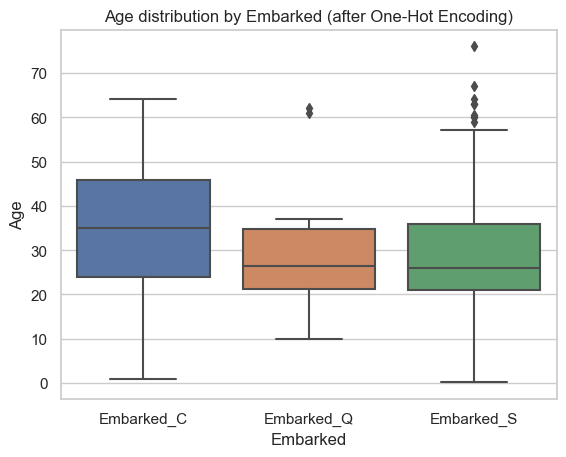

In [36]:
embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
df_melted = df.melt(id_vars='Age', value_vars=embarked_cols, var_name='Embarked', value_name='Value')
df_melted = df_melted[df_melted['Value'] == 1]
sns.boxplot(x='Embarked', y='Age', data=df_melted)
plt.title('Age distribution by Embarked (after One-Hot Encoding)')
plt.show()

In [40]:
# Calculate median for each Embarked group (C, Q, S)
age_median_C = df[df['Embarked_C'] == 1]['Age'].median()
age_median_Q = df[df['Embarked_Q'] == 1]['Age'].median()
age_median_S = df[df['Embarked_S'] == 1]['Age'].median()

# Define a function to fill missing Age based on Embarked
def fill_age(row):
    if pd.isna(row['Age']):
        # Check which Embarked column has value 1, then return the corresponding median
        if row['Embarked_C'] == 1:
            return age_median_C
        elif row['Embarked_Q'] == 1:
            return age_median_Q
        elif row['Embarked_S'] == 1:
            return age_median_S
    else:
        return row['Age']

# Apply the function to fill missing Age values
df['Age'] = df.apply(fill_age, axis=1)

# Verify if there are any remaining missing values in 'Age'
print(df['Age'].isna().sum())


0


In [42]:
# Remove rows with missing values in any column
df_cleaned = df.dropna()

# Verify if there are any missing values left
print(df_cleaned.isna().sum())


PassengerId    0
Survived       0
Pclass         0
Age            0
Ticket         0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
FamilySize     0
dtype: int64


In [46]:
# Drop the 'Ticket' column from the DataFrame
df = df.drop('Ticket', axis=1)

# Verify that the 'Ticket' column has been removed
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize'],
      dtype='object')


In [48]:
# Display the correlation matrix
corr = df.corr()

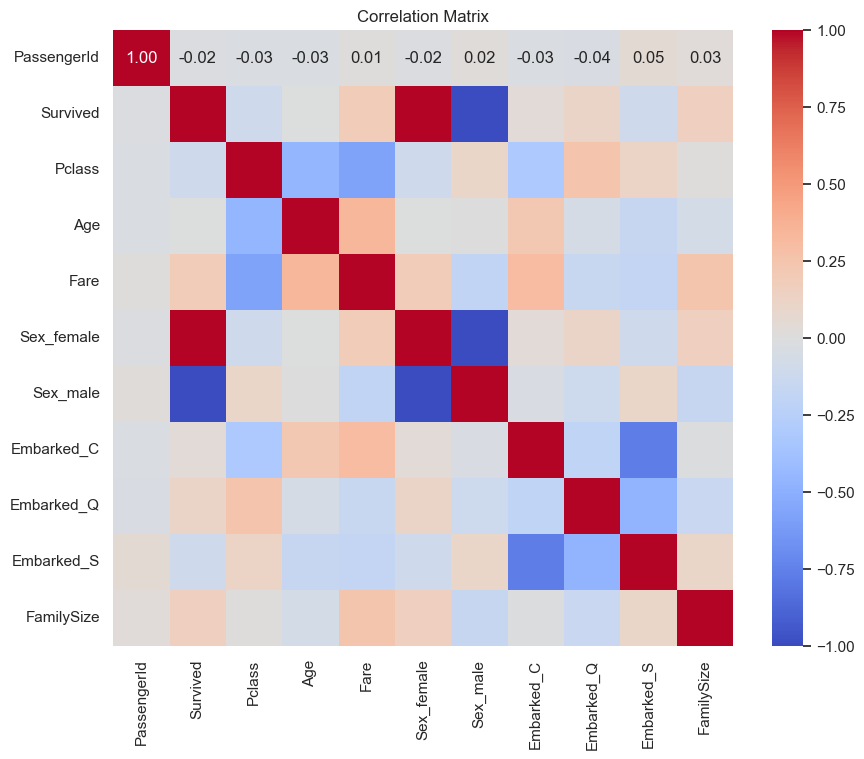

In [50]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

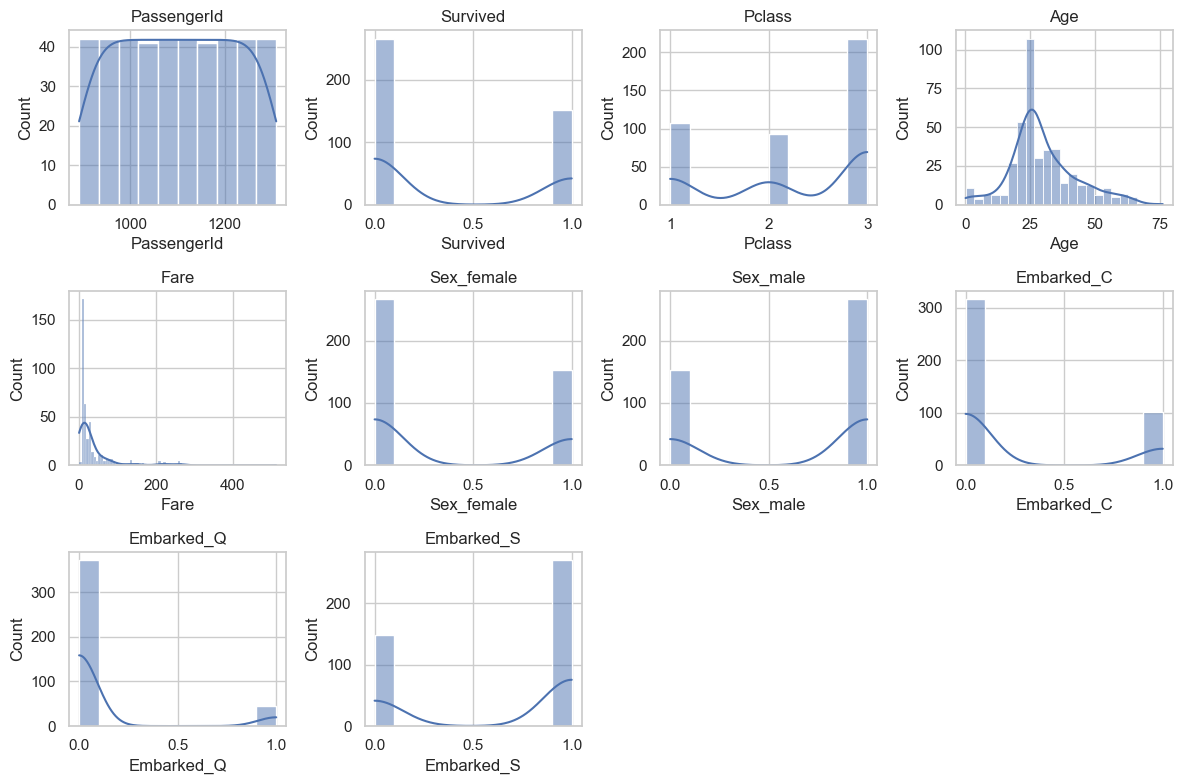

In [53]:
# Display the distribution of the features
plt.figure(figsize=(12, 8))
for column in df.columns[:-1]:
    plt.subplot(3, 4, df.columns.get_loc(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [71]:
df=df.dropna()
# Split the dataset into features and target variable
x  = df.drop('Survived', axis=1)
y = df['Survived']


In [103]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [105]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [107]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression()

In [109]:
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(x_test)


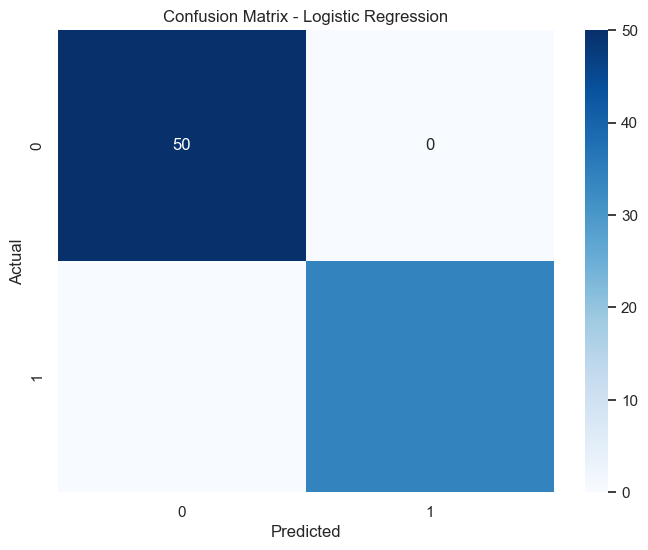

In [111]:
# Display the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [113]:
# Display the classification report
print("Classification Report - Logistic Regression")    

Classification Report - Logistic Regression


In [115]:
accuracy = accuracy_score(y_test, y_pred_log_reg)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%
